<b>THE SPARKS FOUNDATION - GRIPAPR21</b><br>
TASK 1- PREDICTION USING SUPERVISED MACHINE LEARNING

<b>PROBLEM STATEMENT-</b> PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS

<b>TASK BY:<br>JOVITA DLIMA</b>

In [4]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [5]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(6)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.shape

(25, 2)

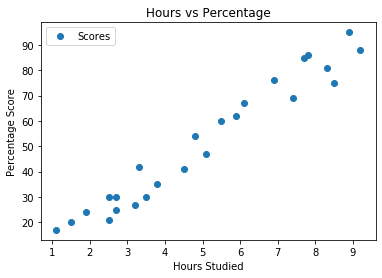

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<b>From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score.</b>

<b>Preparing the data-</b><br>
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Next step is to split this data into training and test set using Scikit-Learn's built-in train_test_split() method:

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=25) 

<b>Training the Algorithm - </b><br>


In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


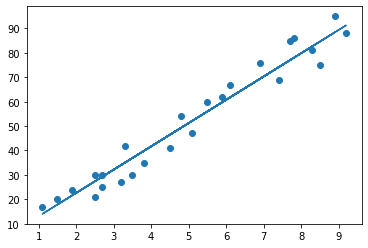

In [20]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

<b>Making Predictions - </b><br>


In [21]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[3.2]
 [2.7]
 [1.9]
 [7.7]
 [4.8]]


COMPARING ACTUAL AND PREDICTED VALUES:

In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,27,34.039712
1,25,29.268910
2,24,21.635627
3,85,76.976930
4,54,49.306278


<b>PREDICTING THE SCORE FOR A STUDENT WHO STUDIES 9.25 HOURS A DAY:</b>

In [23]:

hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 91.76641596073155


<b>Evaluating the model - </b><br>
The final step is to evaluate the performance of algorithm.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.277957406381123
